From the previous notebook, the features present in the dataset was not sufficient, and thus the macro avg was lower. So we now expand the features in the same dataset in order to increase the f1 score of the model.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import re

In [3]:
#reading dataset
df = pd.read_csv(r"E:\major_project\datasets\password_features.csv")

In [4]:
df.head()

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,has_digit,unique_chars,char_diversity,entropy,seq_letters,max_repeat
0,0,agus,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1
1,1,roar,4,0-4,1.0,4,0,0,4,0,1,3,2,1.5,0,1
2,2,malz,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1
3,3,cuba,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1
4,4,pcms,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299661 entries, 0 to 299660
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       299661 non-null  int64  
 1   password         299661 non-null  object 
 2   length           299661 non-null  int64  
 3   bucket           299661 non-null  object 
 4   strength         299661 non-null  float64
 5   lowercase_count  299661 non-null  int64  
 6   uppercase_count  299661 non-null  int64  
 7   special_count    299661 non-null  int64  
 8   digit_count      299661 non-null  int64  
 9   has_special      299661 non-null  int64  
 10  has_digit        299661 non-null  int64  
 11  unique_chars     299661 non-null  int64  
 12  char_diversity   299661 non-null  int64  
 13  entropy          299661 non-null  float64
 14  seq_letters      299661 non-null  int64  
 15  max_repeat       299661 non-null  int64  
dtypes: float64(2), int64(12), object(2)
me

## Adding and updating features

From looking at previous notebook, I found a wrong logic while adding the column "digit_count" which counted alphabet instead of numbers. In this section, we will change it. Similarly, we will add additional features to supplement the model training.

In [6]:
#updating digit_count
df['digit_count'] = df["password"].str.count(r'[0-9]')

In [7]:
df

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,has_digit,unique_chars,char_diversity,entropy,seq_letters,max_repeat
0,0,agus,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
1,1,roar,4,0-4,1.0,4,0,0,0,0,1,3,2,1.500000,0,1
2,2,malz,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
3,3,cuba,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
4,4,pcms,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299656,299995,changepassword___,17,17+,3.0,14,0,3,0,1,1,13,3,3.572469,1,3
299657,299996,stupidmotherfucker,18,17+,2.0,18,0,0,0,0,1,14,2,3.725481,1,1
299658,299997,luistekelounresto,17,17+,4.0,17,0,0,0,0,1,10,2,3.219528,0,1
299659,299998,themontles@yahoo.com,20,17+,4.0,18,0,2,0,1,1,13,3,3.521928,0,2


After correcting the digit_count, we will add ratio features ( divided by length), which is better for trees

In [8]:
##normalization for password containing certain digits
df["digit_ratio"] = df["digit_count"] / df["length"]

#normalized value for passwords with special characters
df["special_ratio"] = df["special_count"] / df["length"]

#normalized value for characters containing unique no. of characters((explained in notebook 2)
df["unique_ratio"] = df["unique_chars"] / df["length"]

#normalization of entropy
df["entropy_norm"]=df["entropy"]/df["length"]


In [9]:
df

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,has_digit,unique_chars,char_diversity,entropy,seq_letters,max_repeat,digit_ratio,special_ratio,unique_ratio,entropy_norm
0,0,agus,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
1,1,roar,4,0-4,1.0,4,0,0,0,0,1,3,2,1.500000,0,1,0.000000,0.000000,0.750000,0.375000
2,2,malz,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
3,3,cuba,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
4,4,pcms,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299656,299995,changepassword___,17,17+,3.0,14,0,3,0,1,1,13,3,3.572469,1,3,0.000000,0.176471,0.764706,0.210145
299657,299996,stupidmotherfucker,18,17+,2.0,18,0,0,0,0,1,14,2,3.725481,1,1,0.000000,0.000000,0.777778,0.206971
299658,299997,luistekelounresto,17,17+,4.0,17,0,0,0,0,1,10,2,3.219528,0,1,0.000000,0.000000,0.588235,0.189384
299659,299998,themontles@yahoo.com,20,17+,4.0,18,0,2,0,1,1,13,3,3.521928,0,2,0.000000,0.100000,0.650000,0.176096


In [10]:
#this is the reverse of seq_letters

def has_desc_sequence(x):
    x = x.lower()
    seqs = [
        'zyxwvutsrqponmlkjihgfedcba',
        '9876543210'
    ]
    for seq in seqs:
        for i in range(len(seq)-2):
            if seq[i:i+3] in x:
                return 1
    return 0

df["desc_seq"] = df["password"].apply(has_desc_sequence)


In [11]:
df['desc_seq'].value_counts()

desc_seq
0    294124
1      5537
Name: count, dtype: int64

In [12]:
#detecting use of year in password (e.g. adams2010)
#function returns an int of bool i.e. 0 or 1, depending if 19xx or 20xx matches in string x
def has_year(x):
    return int(bool(re.search(r'(19|20)\d{2}', x)))

df["has_year"] = df["password"].apply(has_year)


In [13]:
#checking if it worked
year_having_pass = df[df['has_year']>0]

In [14]:
year_having_pass

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,...,char_diversity,entropy,seq_letters,max_repeat,digit_ratio,special_ratio,unique_ratio,entropy_norm,desc_seq,has_year
74,74,1903,4,0-4,0.0,0,0,0,4,0,...,0,2.000000,0,1,1.000000,0.0,1.000000,0.500000,0,1
334,335,1980,4,0-4,0.0,0,0,0,4,0,...,0,2.000000,0,1,1.000000,0.0,1.000000,0.500000,0,1
421,423,2021,4,0-4,1.0,0,0,0,4,0,...,0,1.500000,0,1,1.000000,0.0,0.750000,0.375000,0,1
441,443,1901,4,0-4,0.0,0,0,0,4,0,...,0,1.500000,0,1,1.000000,0.0,0.750000,0.375000,0,1
690,692,2066,4,0-4,1.0,0,0,0,4,0,...,0,1.500000,0,2,1.000000,0.0,0.750000,0.375000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299620,299959,zapatosnegros1979,17,17+,4.0,13,0,0,4,0,...,2,3.616875,0,1,0.235294,0.0,0.764706,0.212757,0,1
299628,299967,masonandaustin1978,18,17+,4.0,14,0,0,4,0,...,2,3.530493,0,1,0.222222,0.0,0.722222,0.196139,0,1
299635,299974,yoselyn2059031789,17,17+,4.0,7,0,0,10,0,...,2,3.734522,1,1,0.588235,0.0,0.823529,0.219678,0,1
299646,299985,ngoomnohangoomnoha202010,24,17+,4.0,18,0,0,6,0,...,2,2.990602,1,2,0.250000,0.0,0.375000,0.124608,0,1


In [15]:
#this feature is to detect the presence of sustitutes such as adams -> @d@ms
def leet_count(x):
    return sum(c in "@$!0" for c in x)

df["leet_count"] = df["password"].apply(leet_count)


In [16]:
#this feature is added to detect passwords such as adams123, where there is a transistion of 1 (adams->1213)
def transitions(x):
    t = 0
    for i in range(len(x)-1):
        if x[i].isalpha() != x[i+1].isalpha():
            t += 1
    return t

df["transitions"] = df["password"].apply(transitions)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299661 entries, 0 to 299660
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       299661 non-null  int64  
 1   password         299661 non-null  object 
 2   length           299661 non-null  int64  
 3   bucket           299661 non-null  object 
 4   strength         299661 non-null  float64
 5   lowercase_count  299661 non-null  int64  
 6   uppercase_count  299661 non-null  int64  
 7   special_count    299661 non-null  int64  
 8   digit_count      299661 non-null  int64  
 9   has_special      299661 non-null  int64  
 10  has_digit        299661 non-null  int64  
 11  unique_chars     299661 non-null  int64  
 12  char_diversity   299661 non-null  int64  
 13  entropy          299661 non-null  float64
 14  seq_letters      299661 non-null  int64  
 15  max_repeat       299661 non-null  int64  
 16  digit_ratio      299661 non-null  floa

## saving file

In [18]:
df.to_csv(r"E:\major_project\datasets\training_ready_df.csv",index=False)

# Training Models

In [19]:
#reading file
clean_df = pd.read_csv(r"E:\major_project\datasets\training_ready_df.csv")

In [45]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299661 entries, 0 to 299660
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       299661 non-null  int64  
 1   password         299661 non-null  object 
 2   length           299661 non-null  int64  
 3   bucket           299661 non-null  object 
 4   strength         299661 non-null  float64
 5   lowercase_count  299661 non-null  int64  
 6   uppercase_count  299661 non-null  int64  
 7   special_count    299661 non-null  int64  
 8   digit_count      299661 non-null  int64  
 9   has_special      299661 non-null  int64  
 10  has_digit        299661 non-null  int64  
 11  unique_chars     299661 non-null  int64  
 12  char_diversity   299661 non-null  int64  
 13  entropy          299661 non-null  float64
 14  seq_letters      299661 non-null  int64  
 15  max_repeat       299661 non-null  int64  
 16  digit_ratio      299661 non-null  floa

## Random Forest

In [21]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
clean_df = clean_df.loc[:, ~clean_df.columns.str.contains('^Unnamed')]

In [48]:
# target
y = clean_df['strength'].astype(int)

# features (drop non-numeric + target)
X = clean_df.drop(columns=['password', 'bucket', 'strength'])

In [51]:
#splitting data before scaling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # this is to split 20% data for testing
    random_state=42,
    stratify=y   # this is for class imbalance
)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       551
           1       0.85      0.60      0.71     20525
           2       0.66      0.72      0.69     19635
           3       0.55      0.72      0.62     12758
           4       0.68      0.75      0.71      6464

    accuracy                           0.68     59933
   macro avg       0.74      0.68      0.69     59933
weighted avg       0.71      0.68      0.68     59933



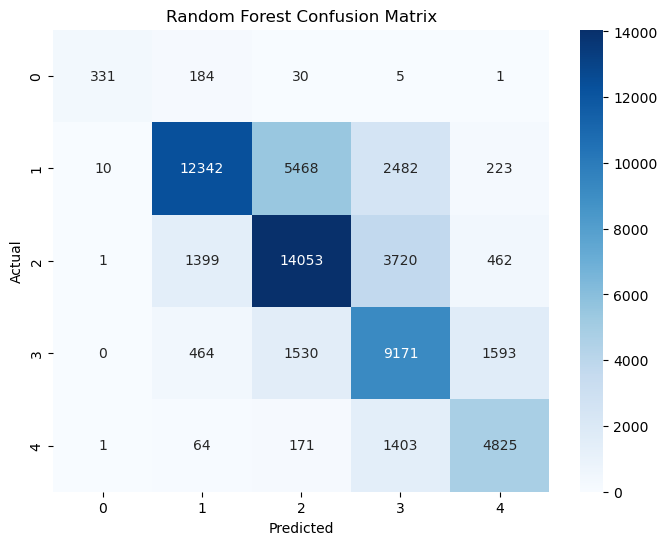

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## XGBoost

In [28]:
from xgboost import XGBClassifier
import numpy as np

# Initializing the model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,    
    max_depth=6,          
    objective='multi:softmax', 
    num_class=5,          # 0, 1, 2, 3, 4
    random_state=42,
    tree_method='hist',   # Fast histogram-based method
    n_jobs=-1
)

# Fitting the model with weights
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

In [29]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75       551
           1       0.90      0.57      0.70     20525
           2       0.68      0.71      0.69     19635
           3       0.53      0.80      0.64     12758
           4       0.70      0.77      0.73      6464

    accuracy                           0.69     59933
   macro avg       0.76      0.69      0.70     59933
weighted avg       0.73      0.69      0.69     59933



Now, we will start with the tuning of the model. For this, we will put a baseline model first, which will act as a reference.

In [30]:
from sklearn.metrics import f1_score
METRIC = 'macro'

## baseline XGBoost model for comparison

In [53]:
# checking class distribution in strength
y.value_counts(normalize=True)


strength
1    0.342460
2    0.327614
3    0.212871
4    0.107859
0    0.009197
Name: proportion, dtype: float64

In [54]:
#baseline configuration
from xgboost import XGBClassifier

baseline = XGBClassifier(
    objective="multi:softprob",  #multi-class classification
    num_class = y.nunique(),      #since values are 0,1,2,3,4
    eval_metric= "mlogloss",   #calculating log loss
    tree_method="hist",         #this results in faster training
    random_state=42,        #for reproducibility
    n_estimators = 100   #no of trees
)

In [55]:
#for corss validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    baseline,  #name of model
    X,         #the features
    y,         #the target
    scoring="f1_macro",   #metric to be evaluated
    cv=cv, # cross-validation strategy
    n_jobs=-1  #uses computers all processors
)

print("Macro-F1 scores:", scores)
print("Mean Macro-F1:", scores.mean())
print("Std:", scores.std())


Macro-F1 scores: [0.71101585 0.71477515 0.70835422 0.71144347 0.71038269]
Mean Macro-F1: 0.7111942756401008
Std: 0.002080439288071779


From the score, we observe that the macro avg is at 71%, with a very low std of 0.002, which means the model is stable. Now, we move to wards tuning.

The first step in tuning is controlling the rate of learning of the trees in the model. This is done using two parameters : no. of trees controlled by n-estimators, and the learning rate. 
The main objective here is to smooth the learning pattern. While looking at the mathemtical objective function, we see that gradient tells the magnitude and direction, while hessian tells the curvature of the slope. So basically, we want to go towards the least error path, while slowing down on sudden curvatures, which the xgboost model does.
So by using a low learning rate and large no. of trees, we ensure the smoothness by taking small steps.

In [38]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y, # to maintain class distribution
    random_state=42
)


In [43]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    "objective": "multi:softprob",
    "num_class": y.nunique(),
    "eval_metric": "mlogloss",
    "tree_method": "hist",
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  #maximum number of boosting rounds
    evals=[(dval, "val")],
    early_stopping_rounds=50,  #stop if no improvement in 50 rounds then stops
    verbose_eval=50  #print log every 50 iterations
)

print("Best iteration:", bst.best_iteration)


[0]	val-mlogloss:1.48253
[50]	val-mlogloss:0.75793
[100]	val-mlogloss:0.67654
[150]	val-mlogloss:0.65641
[200]	val-mlogloss:0.64900
[250]	val-mlogloss:0.64558
[300]	val-mlogloss:0.64343
[350]	val-mlogloss:0.64208
[400]	val-mlogloss:0.64112
[450]	val-mlogloss:0.64043
[500]	val-mlogloss:0.64006
[550]	val-mlogloss:0.63981
[600]	val-mlogloss:0.63963
[650]	val-mlogloss:0.63947
[700]	val-mlogloss:0.63944
[750]	val-mlogloss:0.63945
[763]	val-mlogloss:0.63947
Best iteration: 713


In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

lr_locked = XGBClassifier(
    objective="multi:softprob",
    num_class=y.nunique(),
    eval_metric="mlogloss",
    tree_method="hist",

    learning_rate=0.05,
    n_estimators=713,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,

    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    lr_locked,
    X, y,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1
)

print("Macro-F1:", scores.mean(), "±", scores.std())


Macro-F1: 0.7109818000591877 ± 0.0022733434978386238


There has been little to no improvement with tuning learning rate. So instead, we will try to balance the class weight (instead of unbalanced) and again calculate the macro averages.